<a href="https://colab.research.google.com/github/shreyanilbhuyan/project-heart-disease-pred/blob/main/markowitz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import pandas_datareader.data as web
from datetime import datetime
import matplotlib.pyplot as plt
from random import random

In [ ]:
start = datetime(2020,6,12)
end = datetime(2021,6,12)

In [ ]:
tata=web.DataReader('TCS.NS','yahoo',start,end)
reliance=web.DataReader('RELIANCE.NS','yahoo',start,end)
reddy=web.DataReader('RDY','yahoo',start,end)

In [ ]:
stocks=pd.concat([tata['Close'],reliance['Close'],reddy['Close']],axis=1)
stocks.columns = ['TATA','RELIANCE','DR.REDDY']
stocks

,TATA,RELIANCE,DR.REDDY
Date,,,
2020-06-12,2039.500000,1588.800049,52.400002
2020-06-15,2029.900024,1614.550049,53.849998
2020-06-16,2045.800049,1617.699951,53.070000
2020-06-17,2047.800049,1615.349976,53.439999
2020-06-18,2038.099976,1655.900024,53.290001
...,...,...,...
2021-06-07,3183.199951,2227.399902,71.790001
2021-06-08,3200.149902,2214.600098,72.129997
2021-06-09,3200.250000,2175.000000,71.790001


In [ ]:
returns=stocks/stocks.shift(1)
returns

,TATA,RELIANCE,DR.REDDY
Date,,,
2020-06-12,NaN,NaN,NaN
2020-06-15,0.995293,1.016207,1.027672
2020-06-16,1.007833,1.001951,0.985515
2020-06-17,1.000978,0.998547,1.006972
2020-06-18,0.995263,1.025103,0.997193
...,...,...,...
2021-06-07,1.012549,1.016845,0.993358
2021-06-08,1.005325,0.994253,1.004736
2021-06-09,1.000031,0.982119,0.995286


In [ ]:
logReturns=np.log(returns)
logReturns.dropna(inplace=True)
logReturns

,TATA,RELIANCE,DR.REDDY
Date,,,
2020-06-15,-0.004718,0.016077,0.027296
2020-06-16,0.007802,0.001949,-0.014591
2020-06-17,0.000977,-0.001454,0.006948
2020-06-18,-0.004748,0.024793,-0.002811
2020-06-19,0.003184,0.060628,-0.002066
...,...,...,...
2021-06-07,0.012471,0.016705,-0.006664
2021-06-08,0.005311,-0.005763,0.004725
2021-06-09,0.000031,-0.018043,-0.004725


In [ ]:
nPortfolios=100000
meanLogRet=logReturns.mean()
sigma=logReturns.cov()
weight=np.zeros((nPortfolios,3))
expectedReturn=np.zeros(nPortfolios)
stdev=np.zeros(nPortfolios)
sharpeRatio=np.zeros(nPortfolios)
for k in range(nPortfolios):
   #generating random weight
   w=np.array(np.random.random(3))
   w=w/np.sum(w)
   weight[k,:]=w;
   #Expected log retutrn
   expectedReturn[k]=np.sum(meanLogRet* w)
   #stddev
   stdev[k]=np.sqrt(np.dot(w.T,np.dot(sigma,w)))
   #sharpe ratio
   sharpeRatio[k]=expectedReturn[k]/stdev[k]

In [ ]:
maxIndex=sharpeRatio.argmax()
minIndex=stdev.argmin()
weight[maxIndex,:]

array([0.33746956, 0.17374951, 0.48878093])

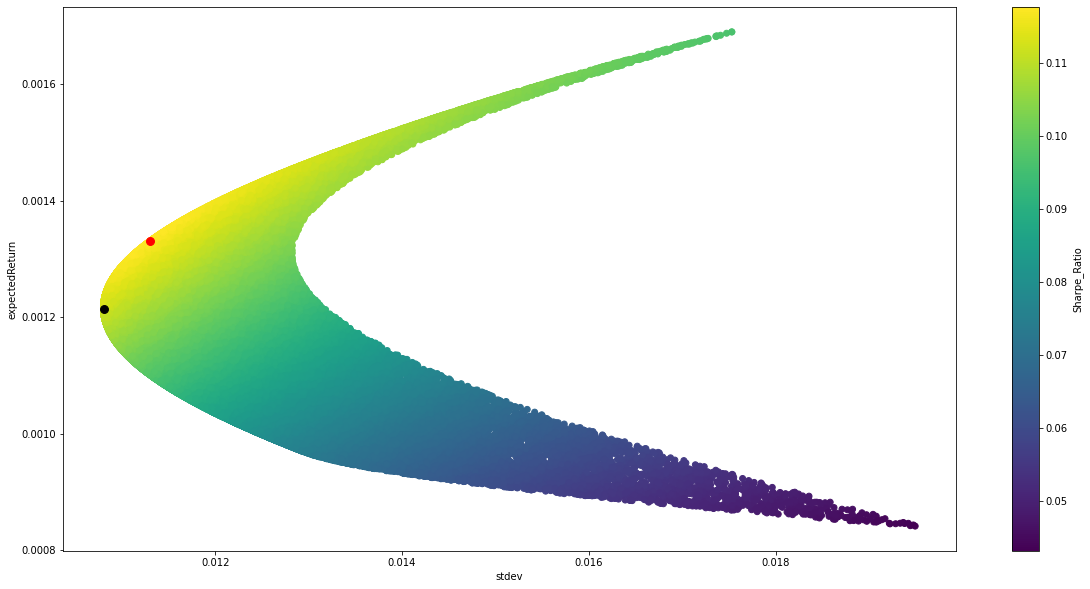

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(stdev,expectedReturn,c=sharpeRatio)
plt.xlabel('stdev')
plt.ylabel('expectedReturn')
plt.colorbar(label='Sharpe_Ratio')
plt.scatter(stdev[maxIndex],expectedReturn[maxIndex],marker='.',c='Red',s=250,label='max_sharp_ratio')
plt.scatter(stdev[minIndex],expectedReturn[minIndex],marker='.',c='Black',s=250,label='min_stdev')
plt.show()